In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
jobdata = pd.read_csv("reallyCleanData.csv")
jobdata

,job_id,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,required_education,industry,function,fraudulent,country,state,city,minSalary,maxSalary,haveSalary
0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unspecified,0,1,0,...,Unspecified,Unspecified,Marketing,0,US,NY,New York,0,0,0
1,2,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,...,Unspecified,Marketing and Advertising,Customer Service,0,NZ,Unspecified,Auckland,0,0,0
2,3,Commissioning Machinery Assistant (CMA),Unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unspecified,0,1,0,...,Unspecified,Unspecified,Unspecified,0,US,IA,Wever,0,0,0
3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,...,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington,0,0,0
4,5,Bill Review Manager,Unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,...,Unspecified,Computer Software,Sales,0,CA,ON,Toronto,0,0,0
17876,17877,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,...,Bachelor's Degree,Internet,Accounting/Auditing,0,US,PA,Philadelphia,0,0,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,Unspecified,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Unspecified,0,0,0,...,Unspecified,Unspecified,Unspecified,0,US,TX,Houston,0,0,0
17878,17879,Graphic Designer,Unspecified,Unspecified,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,...,Professional,Graphic Design,Design,0,NG,LA,Lagos,0,0,0


# Distribution of Data #

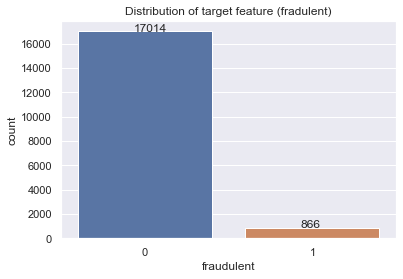

In [4]:
plt.figure(figsize=(6, 4))
ax = sb.countplot(x = "fraudulent", data = jobdata)
plt.title("Distribution of target feature (fradulent)")
for p in ax.patches: #count of each
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))
plt.show()

Data is highly unbalanced as real job posts are way more than fake job posts

# Salary EDA #


Text(0.5, 0.98, 'Distributions of minSalary and maxSalary')

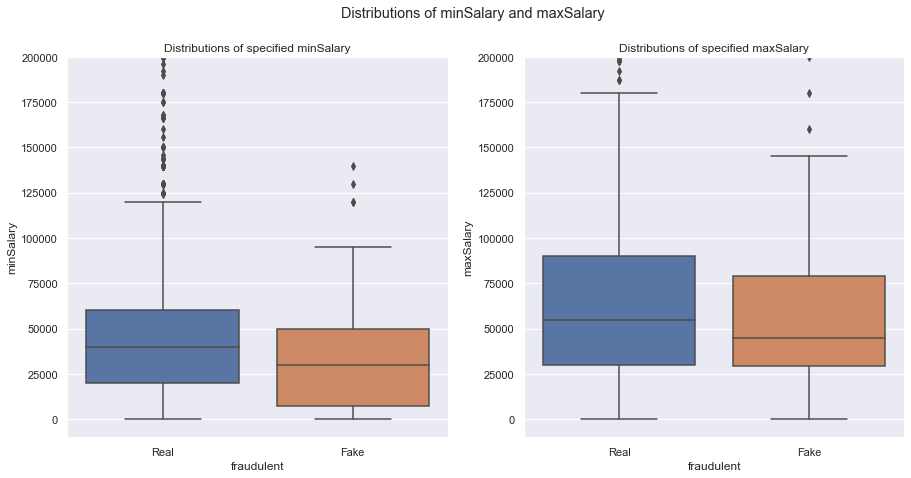

In [5]:
salaryRange = pd.DataFrame(jobdata[["minSalary","maxSalary"]])

fig, axes = plt.subplots(1, 2, figsize=(15,7))
count = 0
for value in salaryRange:
    sb.boxplot(y=jobdata[value], x='fraudulent', data=jobdata[jobdata.haveSalary == 1], ax=axes[count])
    axes[count].set_ylim([-1e4, 2e5])
    axes[count].set_xticklabels(['Real','Fake'])
    axes[count].set_title(f'Distributions of specified {value}')
    count += 1
                              
fig.suptitle('Distributions of minSalary and maxSalary')


Max salary data has very little difference between fake and real job posts.
Min salary data has some difference between real and fake, but the data representation only includes the posts that have indication of salary. 

In [15]:
testData = jobdata[["minSalary","maxSalary","haveSalary", "fraudulent"]]
testData = testData[testData["haveSalary"]==1]
testData = testData[["minSalary","maxSalary", "fraudulent"]]
testData

,minSalary,maxSalary,fraudulent
6,20000,28000,0
10,100000,120000,0
15,120000,150000,0
23,100000,120000,0
31,50000,65000,0
...,...,...,...
17843,30000,50000,0
17849,80000,100000,0
17865,18000,20000,0
17867,18000,19000,0


Only 2700 counts of data have salary. 

<AxesSubplot:>

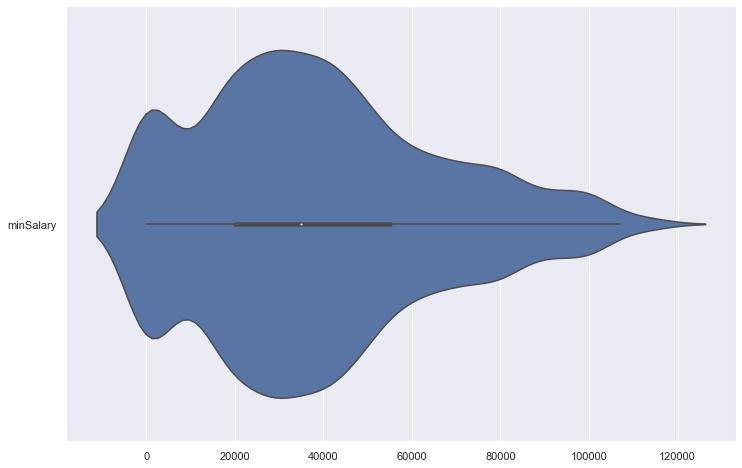

In [25]:
f = plt.figure(figsize=(12,8))

minSalary = testData[["minSalary"]]
upperLimit = minSalary["minSalary"].quantile(0.75) 
lowerLimit = minSalary["minSalary"].quantile(0.25)
iqr = upperLimit - lowerLimit
upperLimit = upperLimit + iqr * 1.5
lowerLimit = lowerLimit - iqr * 1.5
newData = minSalary[(minSalary["minSalary"]<upperLimit) & (minSalary["minSalary"]>lowerLimit)]

sb.violinplot(data = newData, orient = "h")

<AxesSubplot:>

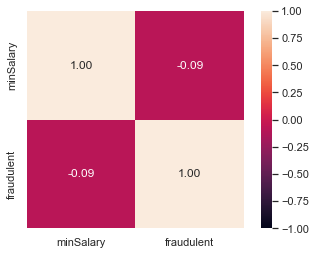

In [27]:
minSalary = testData[["minSalary","fraudulent"]]
newData = minSalary[(minSalary["minSalary"]<upperLimit) & (minSalary["minSalary"]>lowerLimit)]
sb.heatmap(newData.corr(),vmin = -1, vmax = 1, annot = True, fmt=".2f", square = True)

<AxesSubplot:>

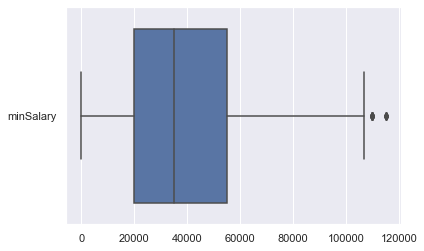

In [51]:
minSalary = testData[["minSalary"]]
newData = minSalary[(minSalary["minSalary"]<upperLimit) & (minSalary["minSalary"]>lowerLimit)]
sb.boxplot(data = newData, orient="h")

# Categorical Variables EDA #

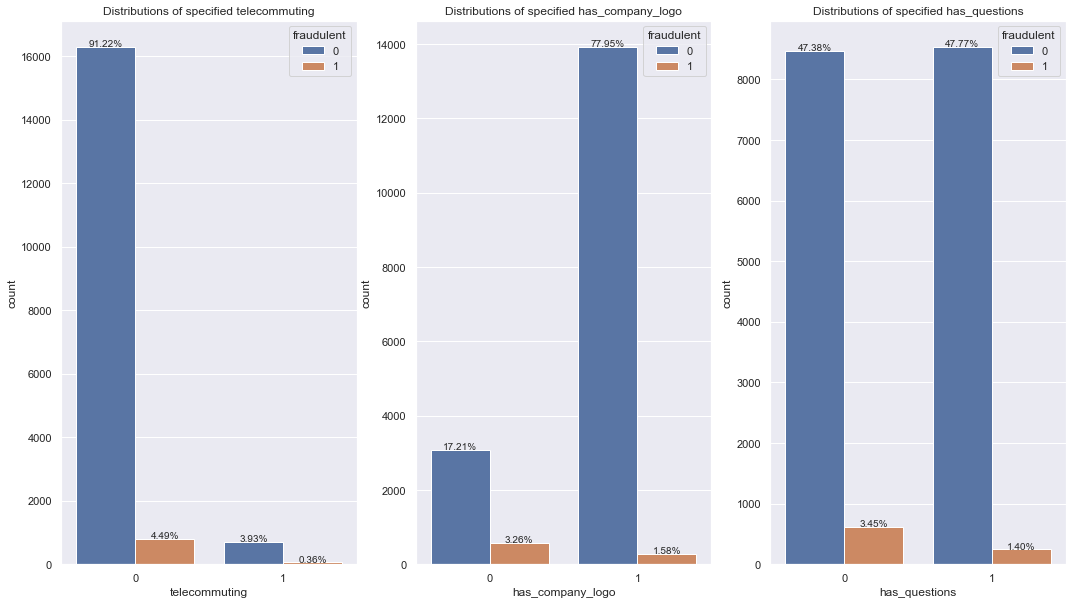

In [28]:
cat_var = ["telecommuting","has_company_logo","has_questions"]

f, axes = plt.subplots(1, 3, figsize=(18,10))
count = 0
for n, col in enumerate(jobdata[cat_var]):
    ax = sb.countplot(x=col, data = jobdata, hue='fraudulent', ax = axes[n])
    #axes[count].set_ylim([-1e4, 2e5])
    axes[count].set_title(f'Distributions of specified {col}')
    total = len(jobdata)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
        
    count += 1

<AxesSubplot:>

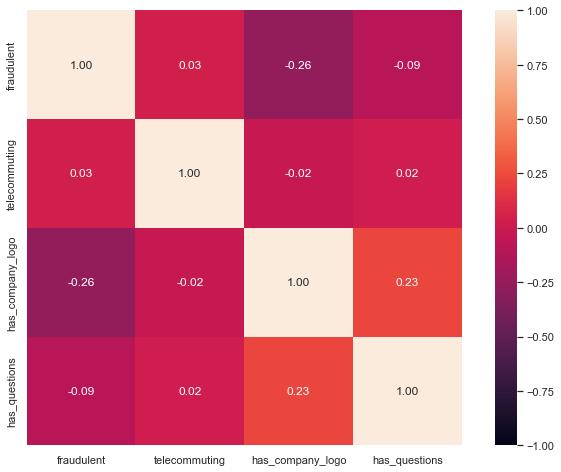

In [29]:
cat_data = pd.DataFrame(jobdata[["fraudulent","telecommuting","has_company_logo","has_questions"]])
f = plt.figure(figsize=(12,8))
corr = cat_data.corr()
sb.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt= ".2f", square = True)

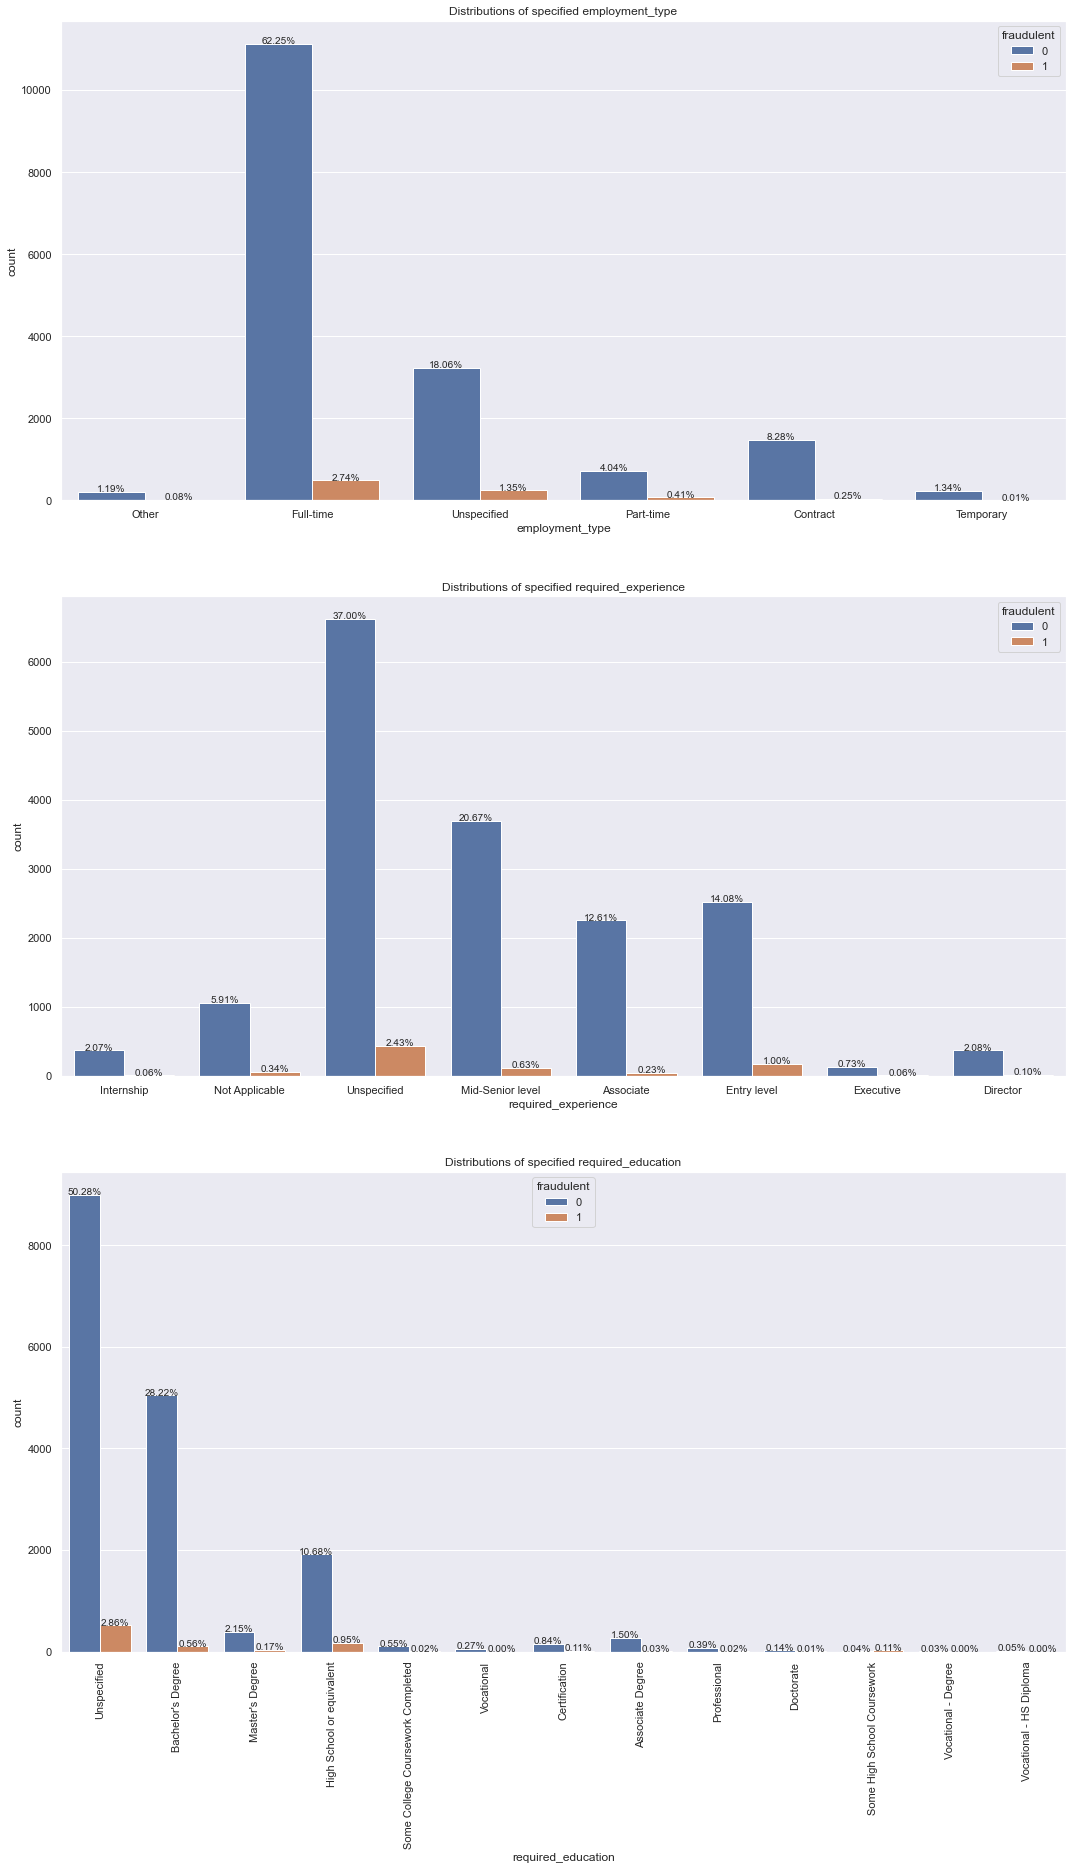

In [30]:
cat_var = ["employment_type","required_experience", "required_education"]
f, axes = plt.subplots(3, figsize=(18,30))

count = 0
for n, col in enumerate(jobdata[cat_var]):
    ax = sb.countplot(x=col, data = jobdata, hue='fraudulent', ax = axes[count])
    axes[count].set_title(f'Distributions of specified {col}')
    plt.xticks(rotation=90)
    for p in ax.patches:
        height = p.get_height()
        if(np.isnan(height)):
            height = 0
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    count += 1



<AxesSubplot:title={'center':'employment_type'}>

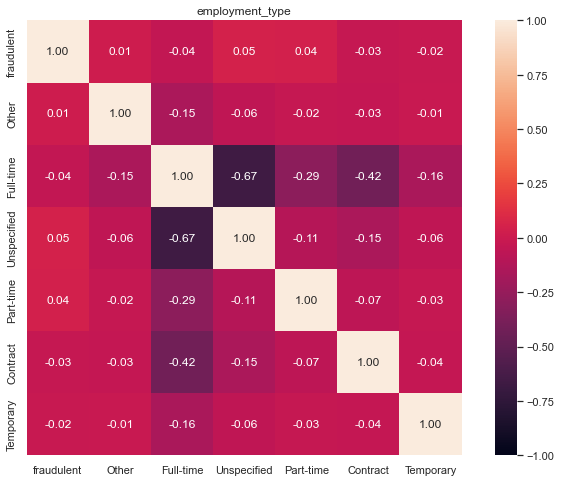

In [31]:
cat_data = pd.DataFrame(jobdata[["fraudulent","employment_type"]])
for index, row in cat_data.iterrows():
    cat_data.at[index,row["employment_type"]] = 1
    

cat_data = cat_data.drop(columns="employment_type")
cat_data.fillna(0, inplace=True)
cat_data = cat_data.astype("int64")
f = plt.figure(figsize=(12,8))
plt.title("employment_type")
corr = cat_data.corr()
sb.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt= ".2f", square = True)

<AxesSubplot:title={'center':'required_experience'}>

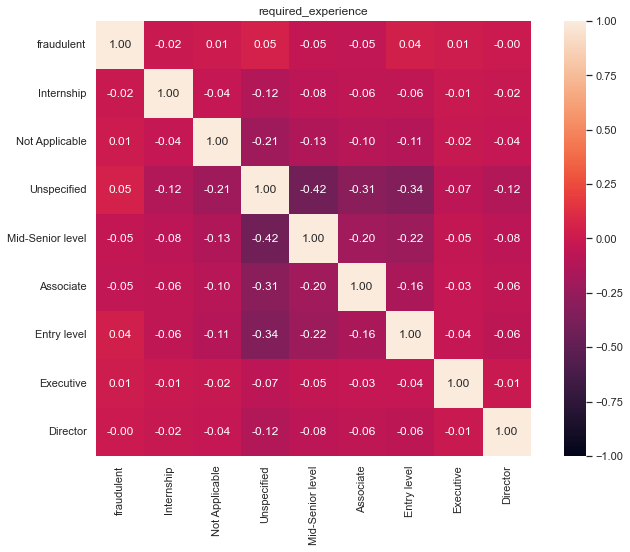

In [32]:
cat_data = pd.DataFrame(jobdata[["fraudulent","required_experience"]])
for index, row in cat_data.iterrows():
    cat_data.at[index,row["required_experience"]] = 1
    

cat_data = cat_data.drop(columns="required_experience")
cat_data.fillna(0, inplace=True)
cat_data = cat_data.astype("int64")
f = plt.figure(figsize=(12,8))
plt.title("required_experience")
corr = cat_data.corr()
sb.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt= ".2f", square = True)

<AxesSubplot:title={'center':'required_education'}>

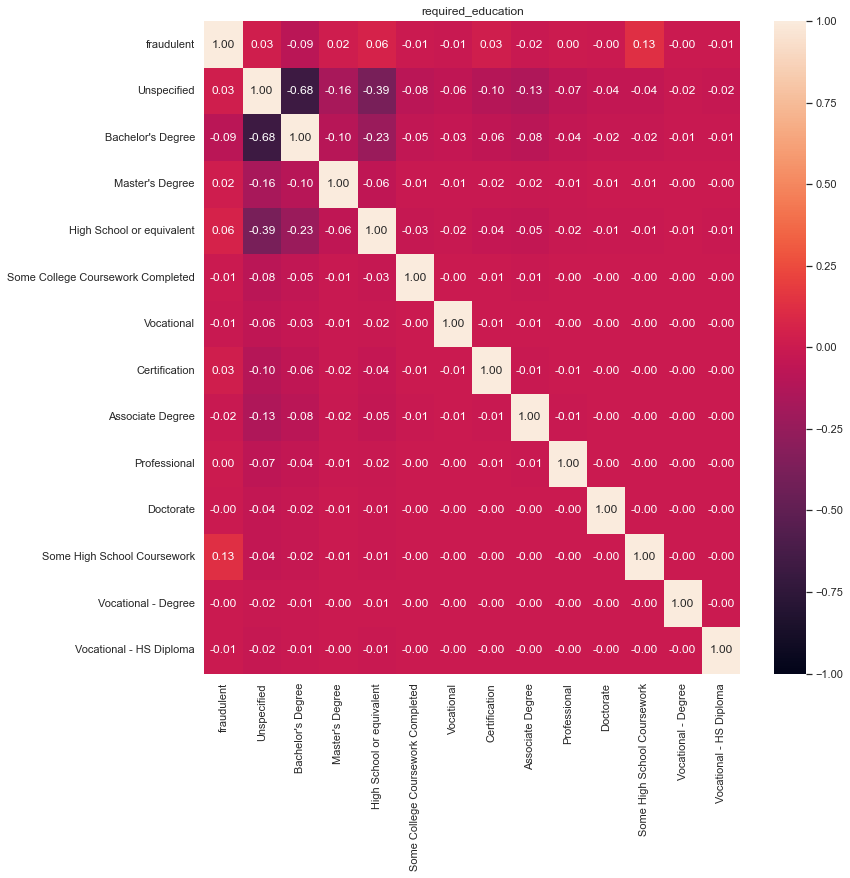

In [33]:
cat_data = pd.DataFrame(jobdata[["fraudulent","required_education"]])
for index, row in cat_data.iterrows():
    cat_data.at[index,row["required_education"]] = 1
    

cat_data = cat_data.drop(columns="required_education")
cat_data.fillna(0, inplace=True)
cat_data = cat_data.astype("int64")
f = plt.figure(figsize=(12,12))
plt.title("required_education")
corr = cat_data.corr()
sb.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt= ".2f")

In [34]:
jobdata["country"].value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
CO        1
SD        1
UG        1
KH        1
Name: country, Length: 91, dtype: int64

In [35]:
country_perc = pd.pivot_table(jobdata, index='country', values='fraudulent', aggfunc = np.sum)
country_perc['% of total Fraudulent Posts'] = (round((country_perc.fraudulent / country_perc.fraudulent.sum()) * 100, 2 ))
country_perc = country_perc.sort_values(['% of total Fraudulent Posts'], ascending=False)
country_perc['% of total Fraudulent Posts'] = country_perc['% of total Fraudulent Posts'].astype(str) + '%'
country_perc['% of total Posts'] = (round((country_perc.fraudulent / len(jobdata.index)) * 100, 2)).astype(str) + '%'

display(country_perc.head(15))


,fraudulent,% of total Fraudulent Posts,% of total Posts
country,,,
US,730,84.3%,4.08%
AU,40,4.62%,0.22%
GB,23,2.66%,0.13%
Unspecified,19,2.19%,0.11%
MY,12,1.39%,0.07%
CA,12,1.39%,0.07%
QA,6,0.69%,0.03%
BH,5,0.58%,0.03%
IN,4,0.46%,0.02%


In [36]:
country_prop = pd.pivot_table(jobdata, index='country', values='fraudulent').sort_values(by='fraudulent', ascending=False)
country_prop['fraudulent'] = (round(country_prop.fraudulent*100,2)).astype(str) + '%'
country_prop.columns = ['Proportions of fradulents posts']
display(country_prop.head(15))

,Proportions of fradulents posts
country,
MY,57.14%
BH,55.56%
TW,50.0%
QA,28.57%
AU,18.69%
ID,7.69%
US,6.85%
SA,6.67%
Unspecified,5.49%


In [37]:
jobdata["department"].value_counts()

Unspecified                                    11547
Sales                                            551
Engineering                                      487
Marketing                                        401
Operations                                       270
                                               ...  
Commercial Management / Contract Management        1
Exec                                               1
Marcomm                                            1
CRM                                                1
Hospitality                                        1
Name: department, Length: 1338, dtype: int64

In [52]:
department_perc = pd.pivot_table(jobdata, index='department', values='fraudulent', aggfunc = np.sum)
department_perc['% of total Fraudulent Posts'] = (round((department_perc.fraudulent / department_perc.fraudulent.sum()) * 100, 2 ))
department_perc['% of total Posts'] = (round((department_perc.fraudulent / len(jobdata.index)) * 100, 2)).astype(str) + '%'
department_perc = department_perc.sort_values(['% of total Fraudulent Posts'], ascending=False)
department_perc['% of total Fraudulent Posts'] = department_perc['% of total Fraudulent Posts'].astype(str) + '%'

display(department_perc.head(15))

,fraudulent,% of total Fraudulent Posts,% of total Posts
department,,,
Unspecified,531,61.32%,2.97%
Engineering,46,5.31%,0.26%
Clerical,27,3.12%,0.15%
Oil & Energy,24,2.77%,0.13%
Information Technology,15,1.73%,0.08%
Administrative,14,1.62%,0.08%
Customer Service,14,1.62%,0.08%
Information Technology,12,1.39%,0.07%
Sales,12,1.39%,0.07%


In [53]:
department_prop = pd.pivot_table(jobdata, index='department', values='fraudulent').sort_values(by='fraudulent', ascending=False)
department_prop['fraudulent'] = (round(department_prop.fraudulent*100,2)).astype(str) + '%'
department_prop.columns = ['Proportions of fradulents posts']
display(department_prop.head(15))

,Proportions of fradulents posts
department,
"Data Entry, Clerical Admin, Administrative Assistant, Customer Service, Accounting, payroll Clerk, Book keeping",100.0%
Work at home,100.0%
COLLECTION DEPT,100.0%
Oil & Energy,100.0%
CALLCENTER TECH,100.0%
CALLCENTER,100.0%
CALLCENTER,100.0%
CALL CENTER,100.0%
HEADQUATERS,100.0%


In [38]:
jobdata["industry"].value_counts()

Unspecified                            4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

In [39]:
industry_perc = pd.pivot_table(jobdata, index='industry', values='fraudulent', aggfunc = np.sum)
industry_perc['% of total Fraudulent Posts'] = (round((industry_perc.fraudulent / industry_perc.fraudulent.sum()) * 100, 2 ))
industry_perc['% of total Posts'] = (round((industry_perc.fraudulent / len(jobdata.index)) * 100, 2)).astype(str) + '%'
industry_perc = industry_perc.sort_values(['% of total Fraudulent Posts'], ascending=False)
industry_perc['% of total Fraudulent Posts'] = industry_perc['% of total Fraudulent Posts'].astype(str) + '%'

display(industry_perc.head(15))

,fraudulent,% of total Fraudulent Posts,% of total Posts
industry,,,
Unspecified,275,31.76%,1.54%
Oil & Energy,109,12.59%,0.61%
Accounting,57,6.58%,0.32%
Hospital & Health Care,51,5.89%,0.29%
Marketing and Advertising,45,5.2%,0.25%
Financial Services,35,4.04%,0.2%
Information Technology and Services,32,3.7%,0.18%
Telecommunications,26,3.0%,0.15%
Real Estate,24,2.77%,0.13%


In [40]:
industry_prop = pd.pivot_table(jobdata, index='industry', values='fraudulent').sort_values(by='fraudulent', ascending=False)
industry_prop['fraudulent'] = (round(industry_prop.fraudulent*100,2)).astype(str) + '%'
industry_prop.columns = ['Proportions of fradulents posts']
display(industry_prop.head(15))

,Proportions of fradulents posts
industry,
Ranching,100.0%
Military,50.0%
Animation,40.0%
Oil & Energy,37.98%
Accounting,35.85%
"Leisure, Travel & Tourism",27.63%
Computer Networking,27.27%
Executive Office,25.0%
Defense & Space,22.22%


In [41]:
jobdata["function"].value_counts()

Unspecified               6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training

In [44]:
function_perc = pd.pivot_table(jobdata, index='function', values='fraudulent', aggfunc = np.sum)
function_perc['% of total Fraudulent Posts'] = (round((function_perc.fraudulent / function_perc.fraudulent.sum()) * 100, 2 ))
function_perc['% of total Posts'] = (round((function_perc.fraudulent / len(jobdata.index)) * 100, 2)).astype(str) + '%'
function_perc = function_perc.sort_values(['% of total Fraudulent Posts'], ascending=False)
function_perc['% of total Fraudulent Posts'] = function_perc['% of total Fraudulent Posts'].astype(str) + '%'

display(function_perc.head(15))

,fraudulent,% of total Fraudulent Posts,% of total Posts
function,,,
Unspecified,337,38.91%,1.88%
Administrative,119,13.74%,0.67%
Engineering,113,13.05%,0.63%
Customer Service,67,7.74%,0.37%
Sales,41,4.73%,0.23%
Other,32,3.7%,0.18%
Information Technology,32,3.7%,0.18%
Accounting/Auditing,29,3.35%,0.16%
Finance,15,1.73%,0.08%


In [45]:
function_prop = pd.pivot_table(jobdata, index='function', values='fraudulent').sort_values(by='fraudulent', ascending=False)
function_prop['fraudulent'] = (round(function_prop.fraudulent*100,2)).astype(str) + '%'
function_prop.columns = ['Proportions of fradulents posts']
display(function_prop.head(15))

,Proportions of fradulents posts
function,
Administrative,18.89%
Financial Analyst,15.15%
Accounting/Auditing,13.68%
Distribution,12.5%
Other,9.85%
Finance,8.72%
Engineering,8.38%
Business Development,5.7%
Advertising,5.56%
